# Segmentation Project

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [4]:
df = pd.read_csv(r"H:\Data Analyst\Python\Project\Mall_Customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariant Analysis

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


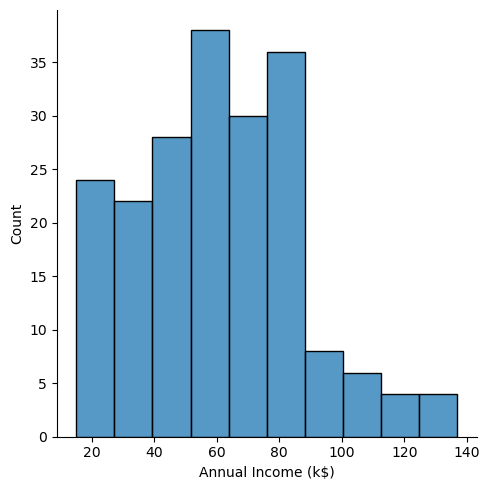

In [12]:
sns.displot(df["Annual Income (k$)"]);

In [14]:
## creating the above plot for more than one columns
# by using a single command
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

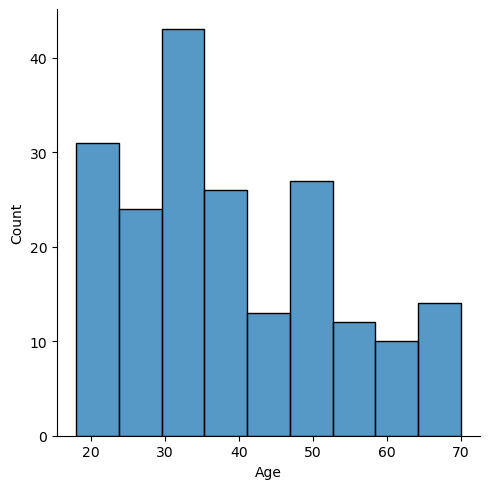

<Figure size 640x480 with 0 Axes>

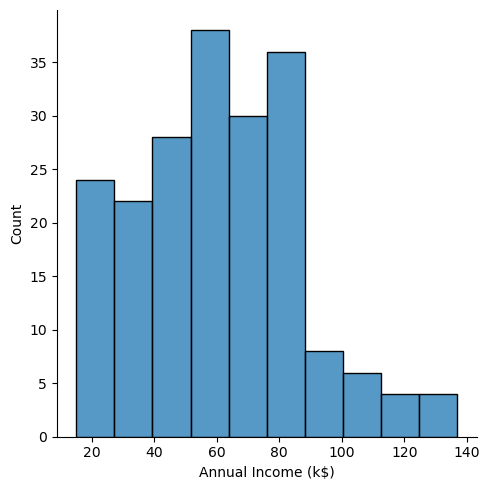

<Figure size 640x480 with 0 Axes>

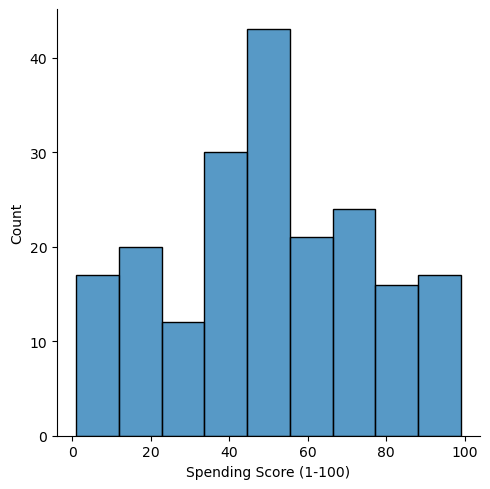

In [16]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

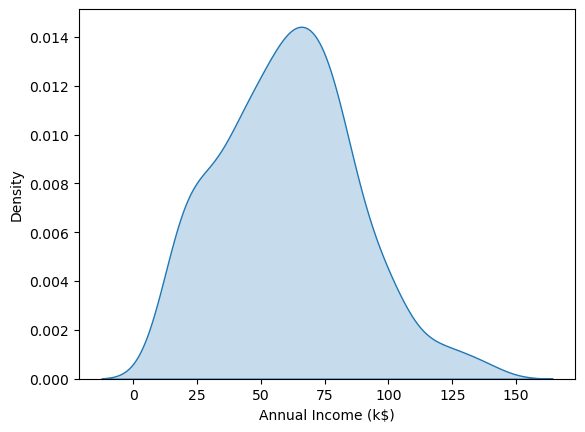

In [17]:
# analyzing through a different plot
# wecan pass different parameters in kde plot
sns.kdeplot(df['Annual Income (k$)'], fill=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

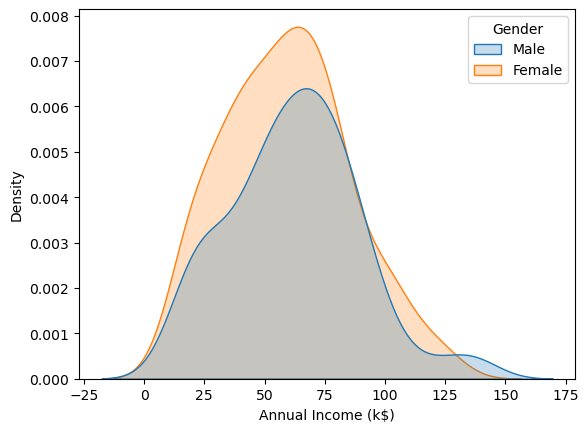

In [20]:
sns.kdeplot(data=df, x = 'Annual Income (k$)', fill=True, hue='Gender')

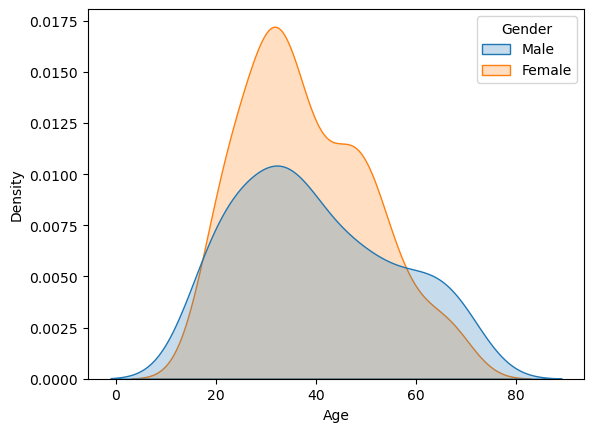

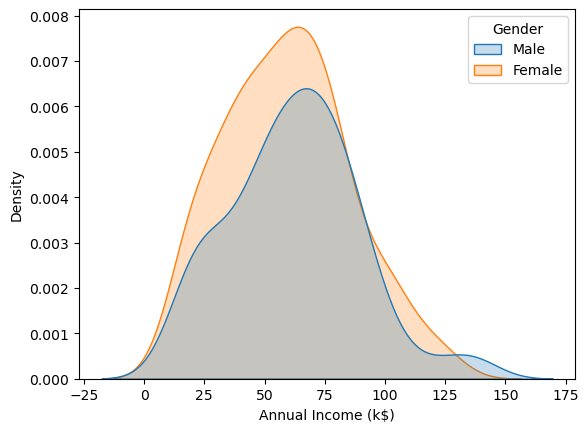

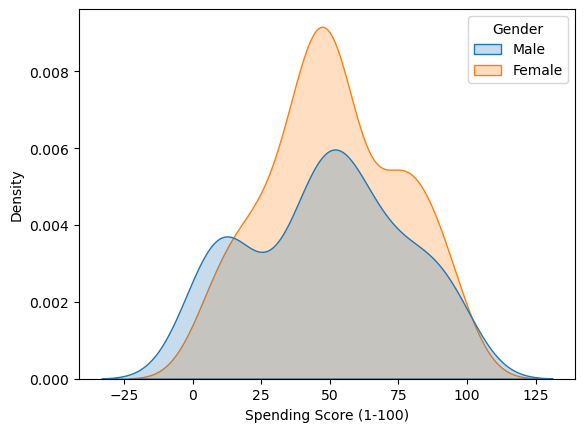

In [22]:
# creatinng multiple kde plot using for loop
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x = i , fill=True, hue='Gender')

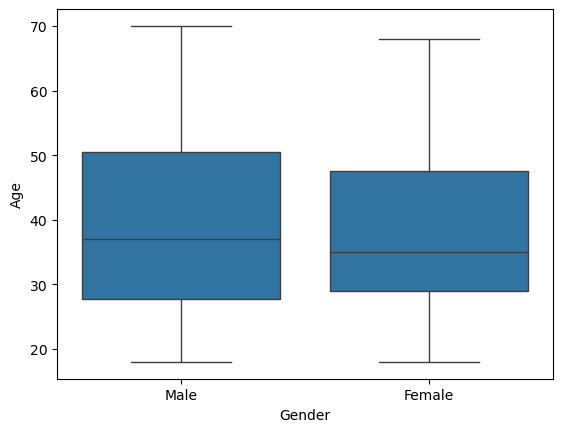

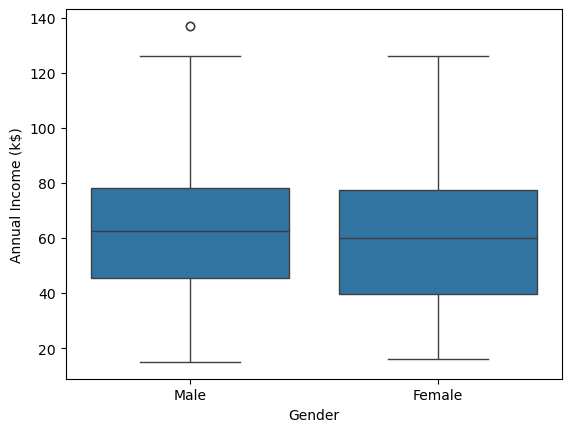

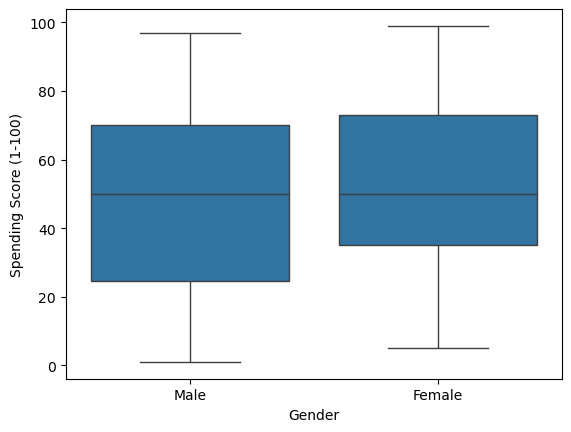

In [24]:
# trying boxplot
# creatinng multiple box plot using for loop
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender' ,y=df[i])


In [26]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [28]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariant analysis

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

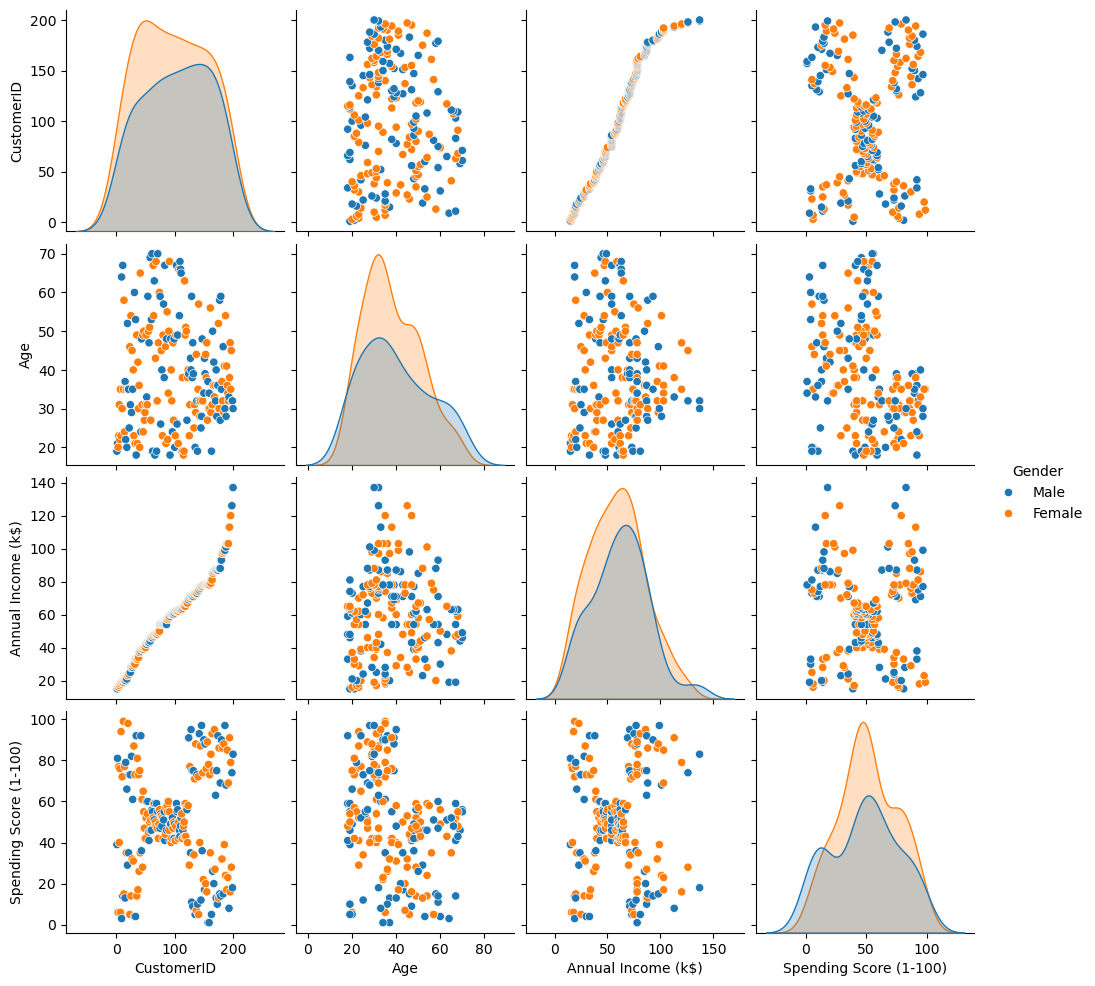

In [33]:
# droping customer ID for easy visualization
#df = df.drop('CustomerID',axis = 1) {Because we don't need to run t again}
#plotting pairplot
sns.pairplot(df, hue='Gender')

In [34]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [1]:
df.corr()

NameError: name 'df' is not defined

In [ ]:
# creating datsets that contain numeric data only for corr
# corr don't work on strings
df_numeric = df.select_dtypes(include=['float','int64']) 
df_numeric.corr()

In [ ]:
# creating heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

# Clustering Univariant, Bivariant, Multivariant

In [44]:
clustering1 = KMeans(n_clusters = 3)

In [46]:
clustering1.fit(df[['Annual Income (k$)']])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [48]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [50]:
# adding clustering column into data frame
df['Income clusters'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [52]:
# checking number of customers falling n each group
df["Income clusters"].value_counts()

Income clusters
2    92
0    72
1    36
Name: count, dtype: int64

In [54]:
# number of clusters could never be defined
# they are ways to find the ideal number of clusters
# we are gonna use the elbow method to find ideal clusters

In [56]:
# inertia score represent the distance from the centroid
clustering1.inertia_

23528.15217391306

In [58]:
# using for loops to identify the score ofclusters
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [59]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 25640.45778439684,
 13844.222098218703,
 8667.679614837507,
 5782.12366493156,
 4195.109621458694,
 2827.308424908427,
 2412.166361416363,
 1867.8520757020765]

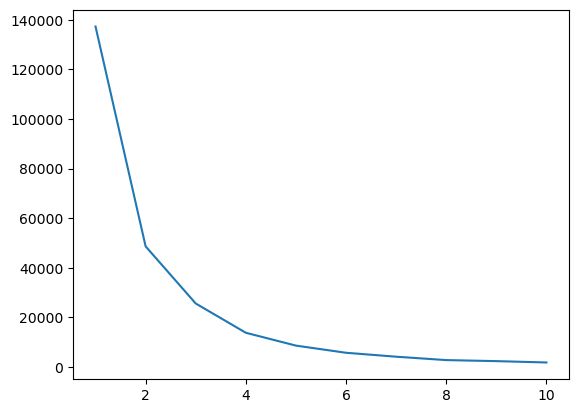

In [60]:
plt.plot(range(1,11),inertia_scores)


In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income clusters'],
      dtype='object')

In [66]:
# analyzing data on the basis of clusters
df.groupby('Income clusters')[[ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income clusters,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


In [68]:
#Bivariant Analysis

In [70]:
clustering2 = KMeans(n_clusters=5) # creating secondcluster
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']]) #fitting into data with two variant
df['Spending and Income cluster'] = clustering2.labels_ # passing into data frame
df.head()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


In [72]:
# identifying ideal number of clusters
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [73]:
inertia_scores2

[269981.28,
 186186.6093728272,
 106348.37306211122,
 97044.66783625729,
 44448.4554479337,
 37442.247450375704,
 31644.3190379202,
 29024.568499838882,
 23992.577109002108,
 20118.018234717176]

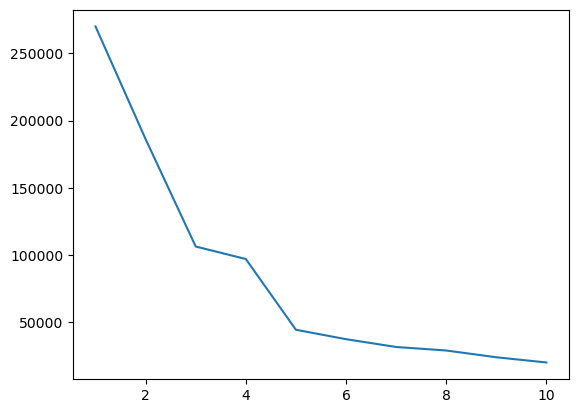

In [74]:
plt.plot(range(1,11), inertia_scores2) # it tells us the ideal number of cluster is 5

In [78]:
df["Spending and Income cluster"].value_counts()

Spending and Income cluster
3    80
2    39
1    36
4    23
0    22
Name: count, dtype: int64

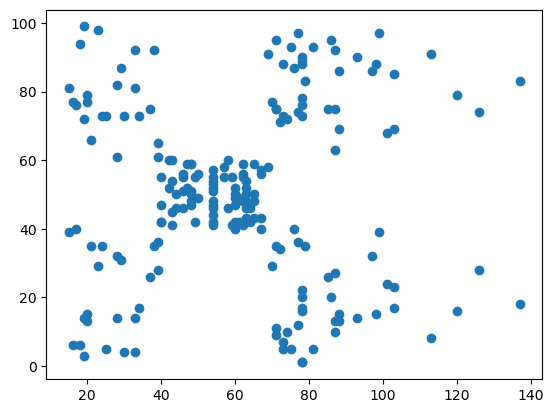

In [85]:
## exploring the dataset
plt.scatter(data = df, x = 'Annual Income (k$)', y='Spending Score (1-100)' )

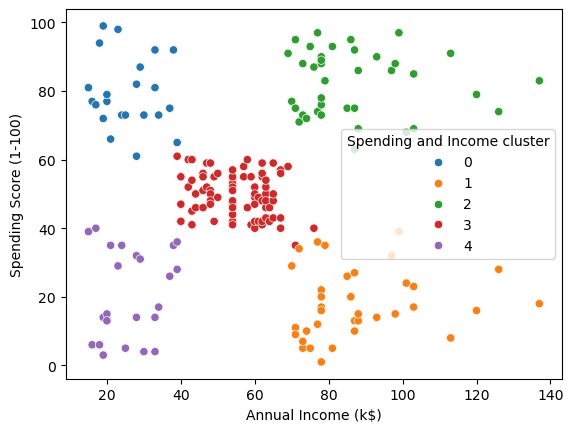

In [213]:
# making it specific
sns.scatterplot(data = df, x = 'Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income cluster', palette='tab10')
plt.savefig('clustering_univariant.png')

In [111]:
centers = pd.DataFrame(clustering2.cluster_centers_) # assigning centers into new dataframe
centers.columns = ['x','y']  #assigning column names

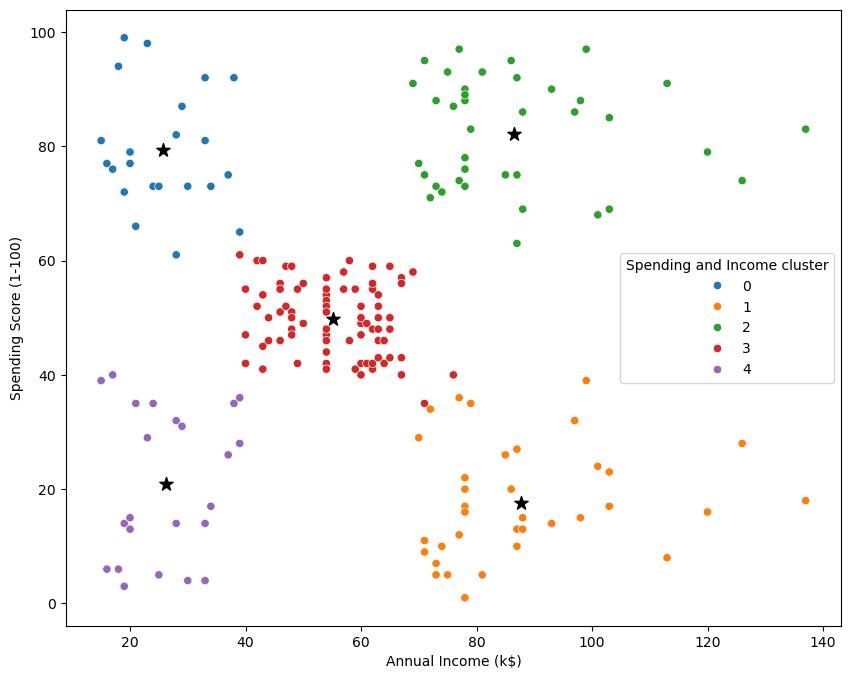

In [211]:
# increasing size
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income cluster', palette='tab10')
plt.savefig('clustering_bivariant.png')

In [129]:
#detail exploring on the basis of gender
pd.crosstab(df['Spending and Income cluster'], df['Gender'], normalize='index') # adding normalize to get the mean

Gender,Female,Male
Spending and Income cluster,,
0,0.590909,0.409091
1,0.472222,0.527778
2,0.538462,0.461538
3,0.587500,0.412500
4,0.608696,0.391304


In [133]:
df.groupby('Spending and Income cluster')[[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

#it recommended cluster 4 is the target with high uncome and hih target score

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,25.272727,25.727273,79.363636
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,42.937500,55.087500,49.712500
4,45.217391,26.304348,20.913043


In [176]:
# multivariate analysis
from sklearn.preprocessing import StandardScaler

In [178]:
scale = StandardScaler()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


In [180]:
# converting gender column into numerical for algorithm processing
# and storing into as new dataframe
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster,Gender_Male
0,1,19,15,39,0,4,True
1,2,21,15,81,0,0,True
2,3,20,16,6,0,4,False
3,4,23,16,77,0,0,False
4,5,31,17,40,0,4,False


In [182]:
dff['Gender_Male'] = dff['Gender_Male'].astype(int) # converting bolean to numerical
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster,Gender_Male
0,1,19,15,39,0,4,1
1,2,21,15,81,0,0,1
2,3,20,16,6,0,4,0
3,4,23,16,77,0,0,0
4,5,31,17,40,0,4,0


In [184]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income clusters', 'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [160]:
dff = scale.fit_transform(dff)

In [190]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']] #droping unnecessary columns
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [192]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [200]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

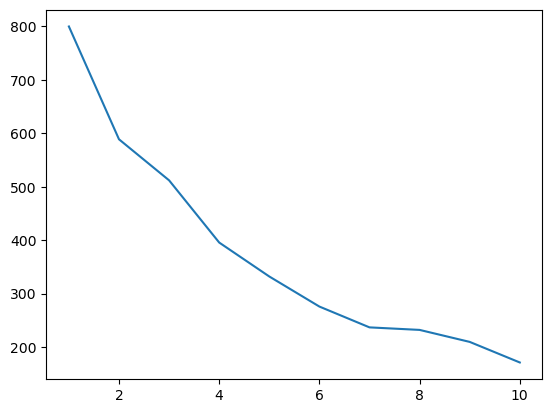

In [201]:
plt.plot(range(1,11),inertia_scores3)

In [205]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1


In [207]:
# saving as csv
df.to_csv('Clustering.csv')